In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ECOMM DATA...xlsx to ECOMM DATA.. (1).xlsx


In [ ]:
ecom = pd.read_excel('ECOMM DATA...xlsx')
ecom.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Product Name.1,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
ecom.iloc[:,10:14]

,Country,Postal Code,Market,Region
0,United States,10024.0,US,East
1,Australia,NaN,APAC,Oceania
2,Australia,NaN,APAC,Oceania
3,Germany,NaN,EU,Central
4,Senegal,NaN,Africa,Africa
...,...,...,...,...
51285,Japan,NaN,APAC,North Asia
51286,United States,77095.0,US,Central
51287,United States,93030.0,US,West
51288,Brazil,NaN,LATAM,South


In [ ]:
ecom.index

RangeIndex(start=0, stop=51290, step=1)

In [ ]:
ecom.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Product Name.1', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
ecom.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


In [ ]:
top_10_City = ecom['City'].value_counts().head(10)
top_10_State = ecom['State'].value_counts().head(10)
top_10_Country = ecom['Country'].value_counts().head(10)
top_region = ecom['Region'].value_counts().head()

print(top_10_City)
print(top_10_State)
print(top_10_Country)
print(top_region)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Manila           432
Seattle          428
Houston          377
Tegucigalpa      362
Jakarta          337
Name: count, dtype: int64
State
California                2001
England                   1499
New York                  1128
Texas                      985
Ile-de-France              981
New South Wales            781
North Rhine-Westphalia     719
Queensland                 717
San Salvador               615
Pennsylvania               587
Name: count, dtype: int64
Country
United States     9994
Australia         2837
France            2827
Mexico            2644
Germany           2065
China             1880
United Kingdom    1633
Brazil            1599
India             1555
Indonesia         1390
Name: count, dtype: int64
Region
Central    11117
South       6645
EMEA        5029
North       4785
Africa      4587
Name: count, dtype: int64


In [ ]:
top_Category = ecom['Category'].value_counts().head()
top_10_Sub_Category = ecom['Sub-Category'].value_counts().head(10)

print(top_Category)
print(top_10_Sub_Category)

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Name: count, dtype: int64


In [ ]:
ecom.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [ ]:
ecom.drop('Product Name.1', axis = 1, inplace = True)

In [ ]:
ecom['Postal Code'].head()

,Postal Code
0,10024.0
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:

ecom['Postal Code'].fillna('00000', inplace=True)

# 2. Impute using the mode of the postal code for the same city and state (if you have city and state)
mode_postal_code = ecom.groupby(['City', 'State'])['Postal Code'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else '00000')
ecom['Postal Code'] = ecom.apply(lambda row: mode_postal_code.get((row['City'], row['State']), '00000') if pd.isnull(row['Postal Code']) else row['Postal Code'], axis=1)

In [ ]:
ecom['Postal Code'].head()

,Postal Code
0,10024.0
1,00000
2,00000
3,00000
4,00000


In [ ]:
ecom['Postal Code'] = ecom['Postal Code'].astype(int)

In [ ]:
ecom['Postal Code'].dtype

dtype('int64')

In [ ]:
ecom.iloc[:, 2:4].head()

,Order Date,Ship Date
0,2012-07-31,2012-07-31
1,2013-02-05,2013-02-07
2,2013-10-17,2013-10-18
3,2013-01-28,2013-01-30
4,2013-11-05,2013-11-06


In [ ]:
# Extract year and sequence number
ecom['Year'] = ecom['Order ID'].str.extract(r'-(\d{4})-')
ecom['Sequence Number'] = ecom['Order ID'].str.extract(r'-(\d+)$')

# Convert to numeric types
ecom['Year'] = pd.to_numeric(ecom['Year'])
ecom['Sequence Number'] = pd.to_numeric(ecom['Sequence Number'])

print(ecom)

       Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       32298   CA-2012-124891 2012-07-31 2012-07-31        Same Day   
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
2       25330    IN-2013-71249 2013-10-17 2013-10-18     First Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
4       47221     SG-2013-4320 2013-11-05 2013-11-06        Same Day   
...       ...              ...        ...        ...             ...   
51285   29002    IN-2014-62366 2014-06-19 2014-06-19        Same Day   
51286   35398   US-2014-102288 2014-06-20 2014-06-24  Standard Class   
51287   40470   US-2013-155768 2013-12-02 2013-12-02        Same Day   
51288    9596   MX-2012-140767 2012-02-18 2012-02-22  Standard Class   
51289    6147   MX-2012-134460 2012-05-22 2012-05-26    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1

In [ ]:
ecom.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Sequence Number
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,7,0.0,762.1845,933.57,Critical,2012,124891
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",9,0.1,-288.7650,923.63,Critical,2013,77878
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",9,0.1,919.9710,915.49,Medium,2013,71249
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",5,0.1,-96.5400,910.16,Medium,2013,1579342
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",8,0.0,311.5200,903.04,Critical,2013,4320


In [ ]:
ecom['Year'].value_counts()

,count
Year,
2014,17531
2013,13799
2012,10962
2011,8998


In [ ]:
ecom['Customer Name'].value_counts().head(10)

,count
Customer Name,
Muhammed Yedwab,108
Steven Ward,106
Gary Hwang,102
Patrick O'Brill,102
Bill Eplett,102
Harry Greene,101
Eric Murdock,100
Art Ferguson,98
Brosina Hoffman,97


In [ ]:
ecom['Sequence Number'].count()

51290

In [ ]:
ecom.loc[ecom['Sequence Number'].duplicated(keep=False), ['Order ID', 'Sequence Number', 'Year']]

,Order ID,Sequence Number,Year
0,CA-2012-124891,124891,2012
1,IN-2013-77878,77878,2013
2,IN-2013-71249,71249,2013
4,SG-2013-4320,4320,2013
5,IN-2013-42360,42360,2013
...,...,...,...
51282,MX-2012-100258,100258,2012
51285,IN-2014-62366,62366,2014
51286,US-2014-102288,102288,2014
51287,US-2013-155768,155768,2013


In [ ]:
ecom['Customer Name'].nunique()

795

In [ ]:
num_cols = ecom.select_dtypes(include=['int64','float64'])
cat_cols = ecom.select_dtypes(include=['object'])
num_cols.head()

,Row ID,Postal Code,Quantity,Discount,Profit,Shipping Cost,Year,Sequence Number
0,32298,10024,7,0.0,762.1845,933.57,2012,124891
1,26341,0,9,0.1,-288.7650,923.63,2013,77878
2,25330,0,9,0.1,919.9710,915.49,2013,71249
3,13524,0,5,0.1,-96.5400,910.16,2013,1579342
4,47221,0,8,0.0,311.5200,903.04,2013,4320


In [ ]:
num_cols.dtypes

,0
Row ID,int64
Postal Code,int64
Quantity,int64
Discount,float64
Profit,float64
Shipping Cost,float64
Year,int64
Sequence Number,int64


In [ ]:
cat_cols.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical


In [ ]:
num_cols.describe()

,Row ID,Postal Code,Quantity,Discount,Profit,Shipping Cost,Year,Sequence Number
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,5.129000e+04
mean,25645.50000,10753.999844,3.476545,0.142908,28.610982,26.375818,2012.777208,7.455289e+05
std,14806.29199,26042.011167,2.278766,0.212280,174.340972,57.296810,1.098931,1.495003e+06
min,1.00000,0.000000,1.000000,0.000000,-6599.978000,0.002000,2011.000000,0.000000e+00
25%,12823.25000,0.000000,2.000000,0.000000,0.000000,2.610000,2012.000000,3.034100e+04
50%,25645.50000,0.000000,3.000000,0.000000,9.240000,7.790000,2013.000000,1.157560e+05
75%,38467.75000,0.000000,5.000000,0.200000,36.810000,24.450000,2014.000000,1.601290e+05
max,51290.00000,99301.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000,5.994251e+06


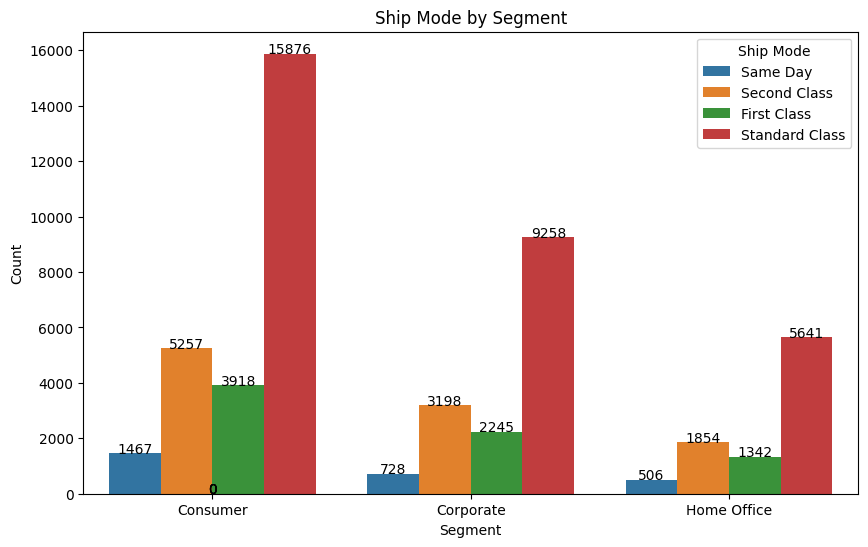

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cat_cols, x='Segment', hue='Ship Mode')
plt.title('Ship Mode by Segment')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.legend(title='Ship Mode')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center")

plt.show()

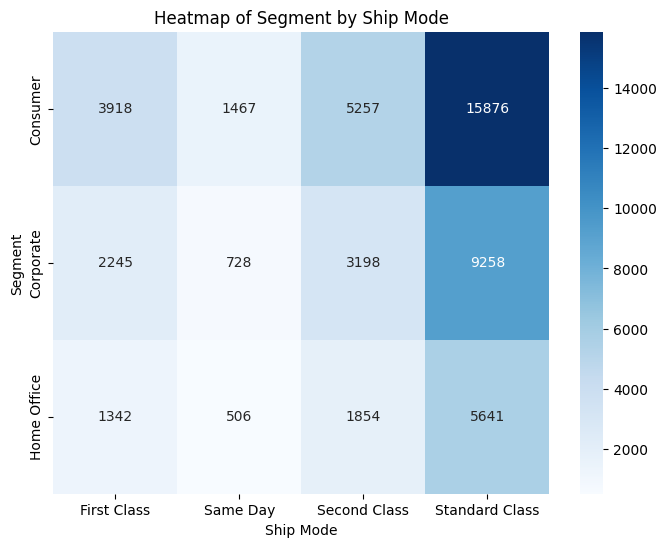

In [ ]:
crosstab = pd.crosstab(cat_cols['Segment'], cat_cols['Ship Mode'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Segment by Ship Mode')
plt.ylabel('Segment')
plt.xlabel('Ship Mode')
plt.show()

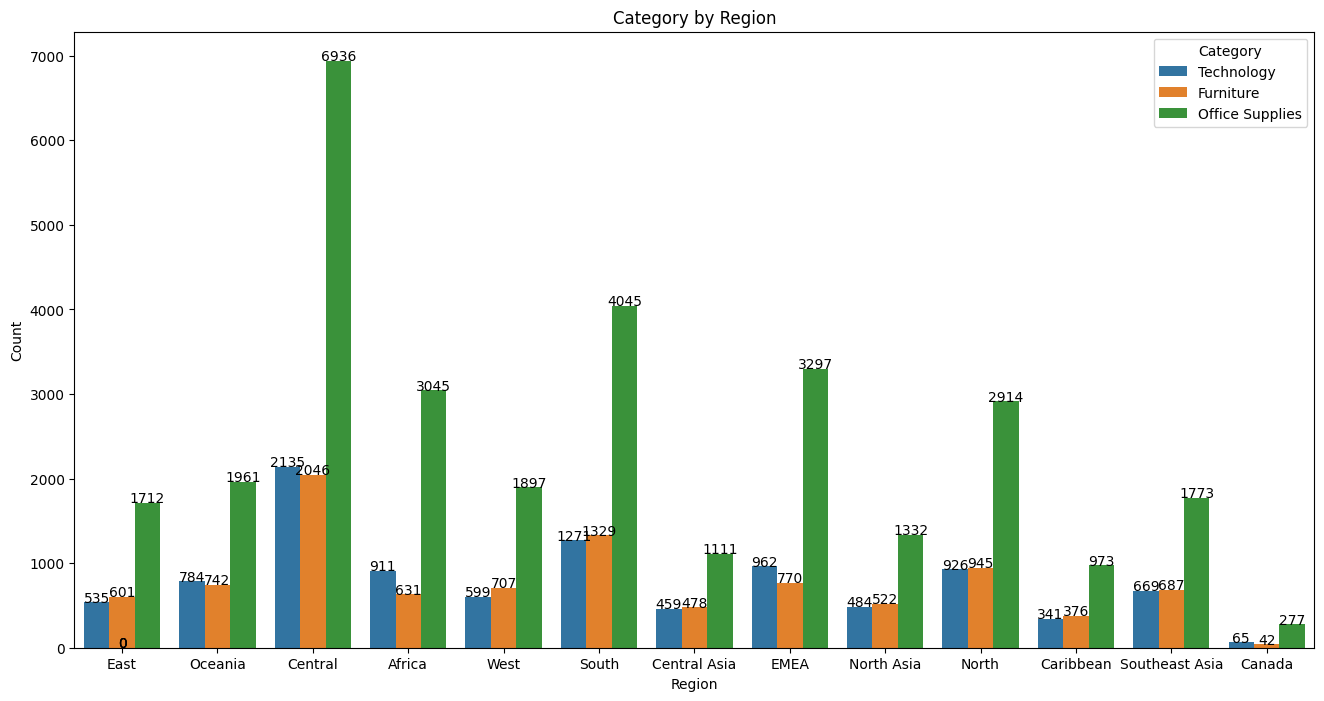

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=cat_cols, x='Region', hue='Category')
plt.title('Category by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Category')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center")

plt.show()

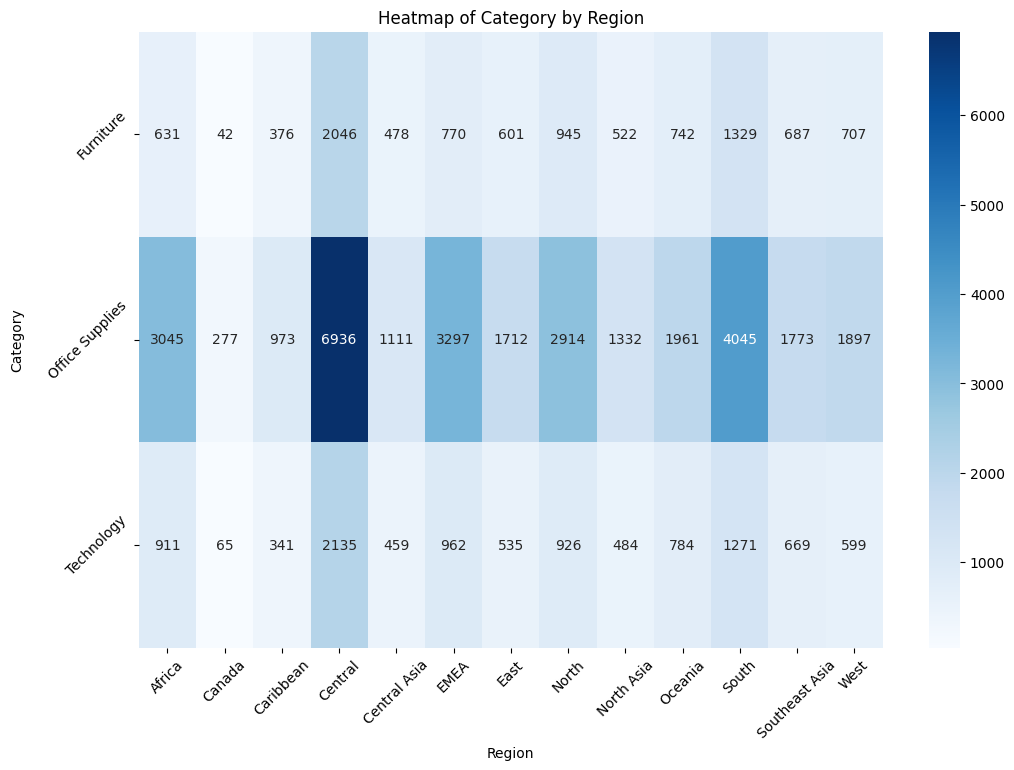

In [ ]:
crosstab = pd.crosstab(cat_cols['Category'], cat_cols['Region'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Heatmap of Category by Region')
plt.ylabel('Category\n')
plt.xlabel('Region')
plt.show()

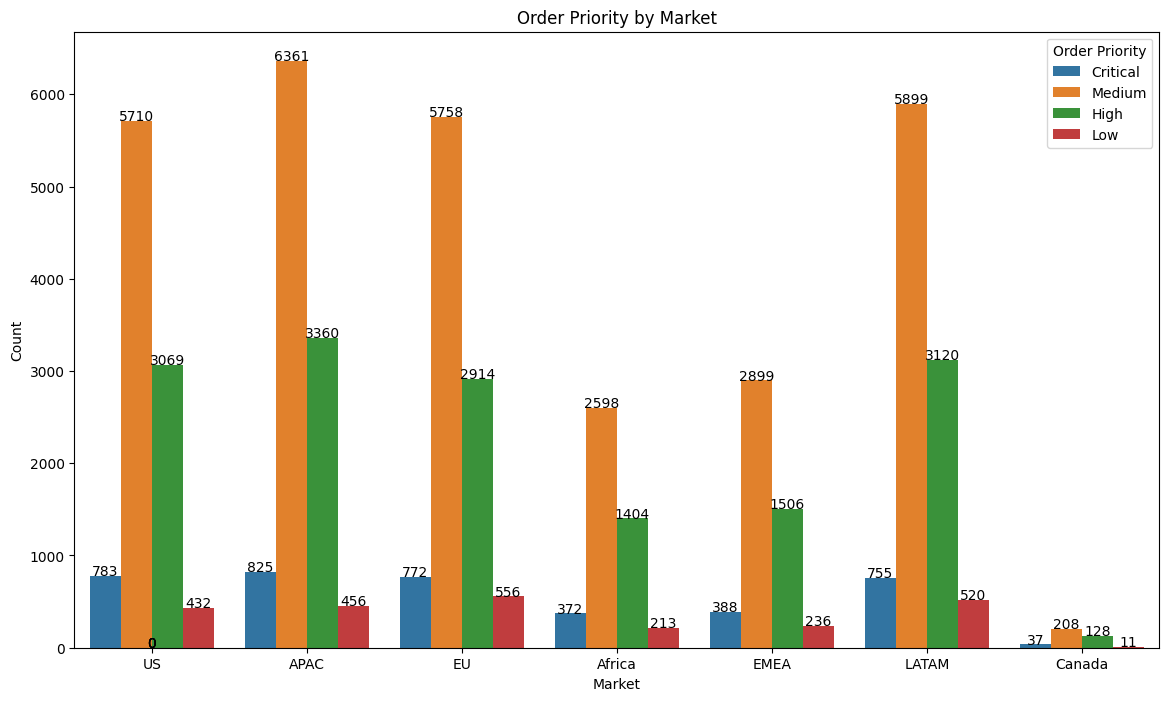

In [ ]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=cat_cols, x='Market', hue='Order Priority')
plt.title('Order Priority by Market')
plt.ylabel('Count')
plt.xlabel('Market')
plt.legend(title='Order Priority')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center")

plt.show()

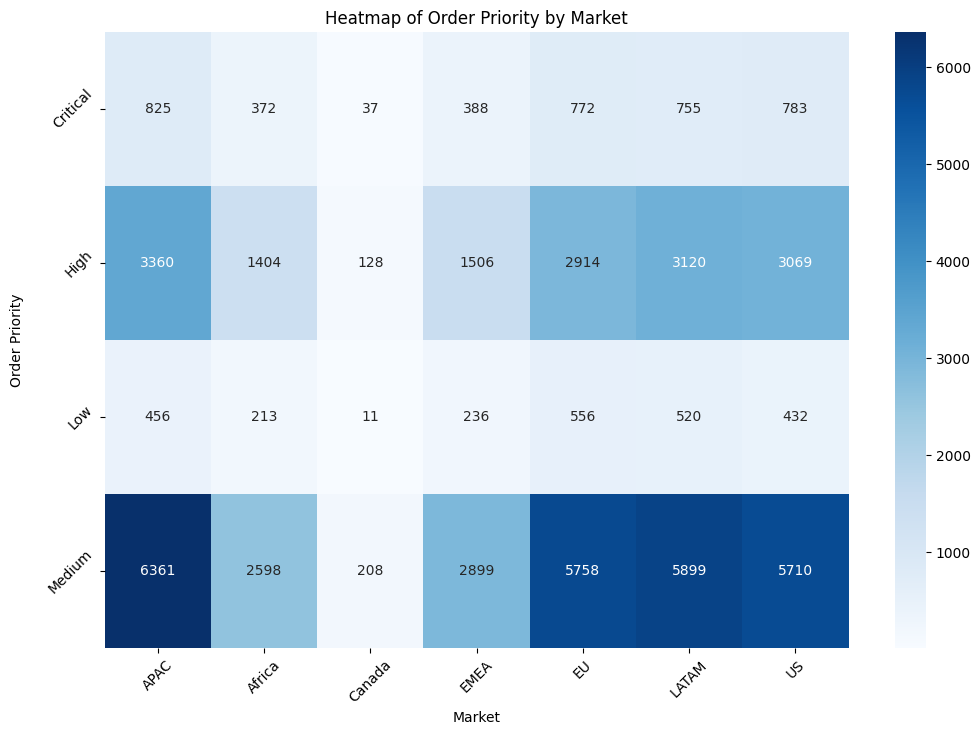

In [ ]:
crosstab = pd.crosstab(cat_cols['Order Priority'], cat_cols['Market'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Heatmap of Order Priority by Market')
plt.ylabel('Order Priority\n')
plt.xlabel('Market')
plt.show()

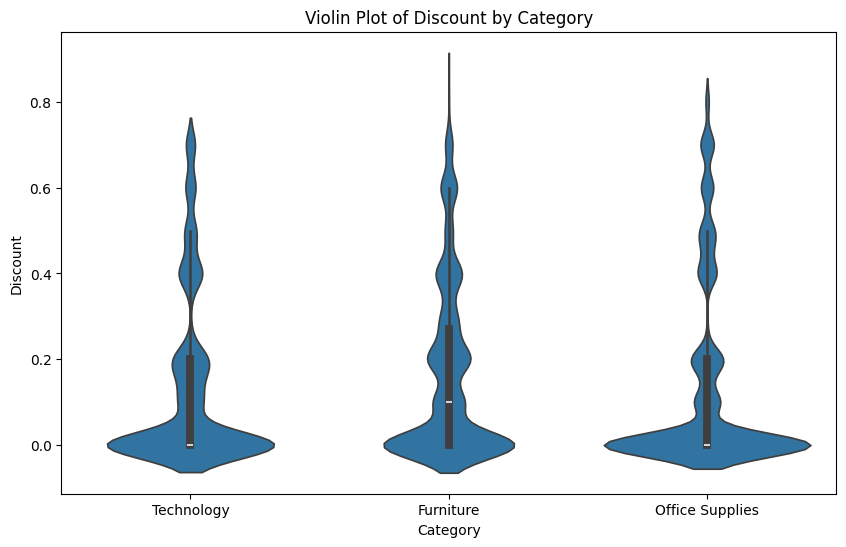

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ecom, x='Category', y='Discount')
plt.title('Violin Plot of Discount by Category')
plt.xlabel('Category')
plt.ylabel('Discount')
plt.show()


In [ ]:
from seaborn import color_palette

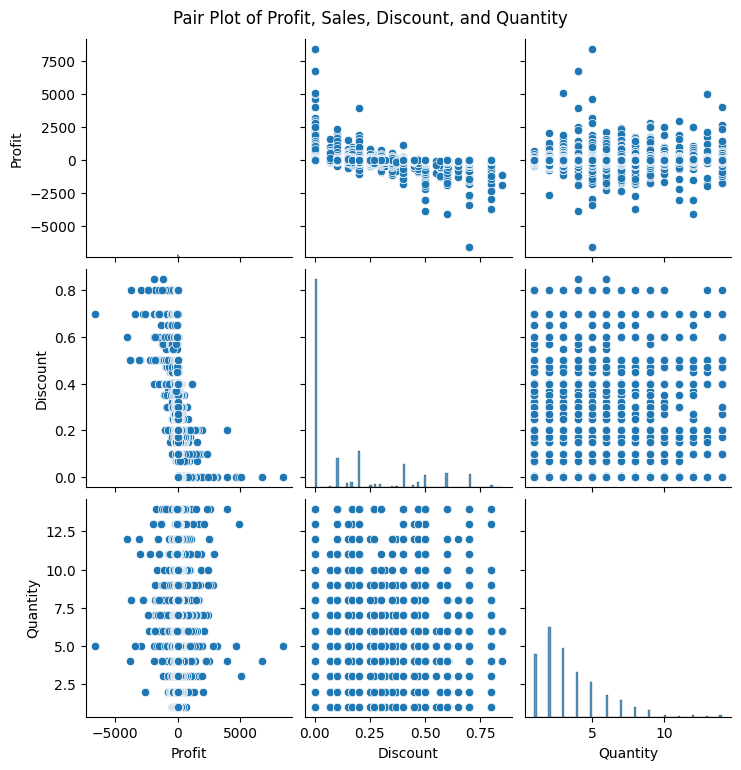

In [ ]:
sns.pairplot(num_cols[['Profit', 'Discount', 'Quantity']], palette="rocket")
plt.suptitle('Pair Plot of Profit, Sales, Discount, and Quantity', y=1.02)
plt.show()

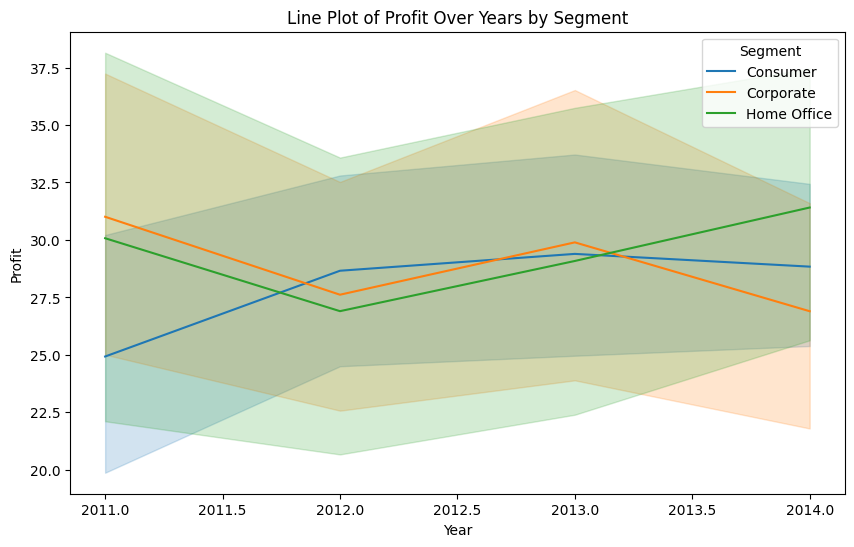

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ecom, x='Year', y='Profit', hue='Segment')
plt.title('Line Plot of Profit Over Years by Segment')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()


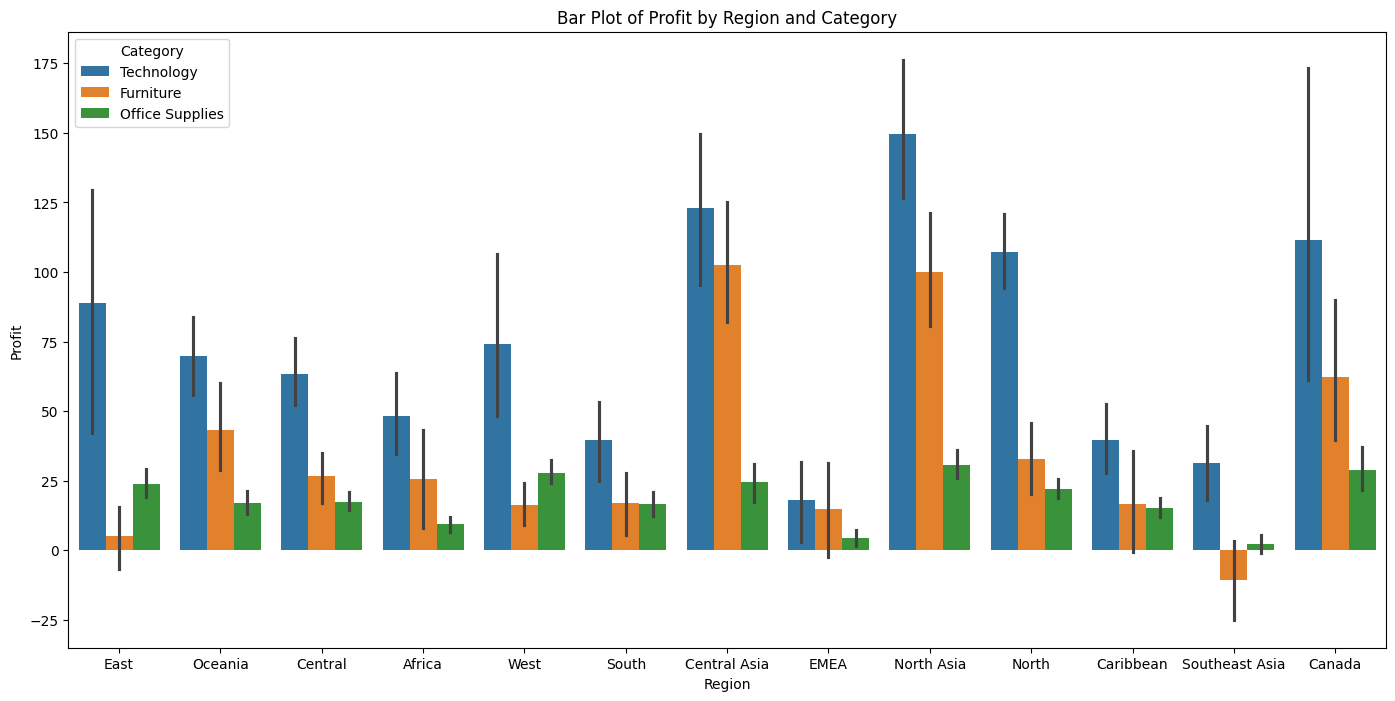

In [ ]:
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=ecom, x='Region', y='Profit', hue='Category')
plt.title('Bar Plot of Profit by Region and Category')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()